In [1]:
import numpy as np
from random import random
from matplotlib import pyplot as plt

In [2]:
from calc import distance, intersection, parallel, angle, orthogonal
from draw import draw
from line import Line
from plane import Plane
from point import Point
from solver import solve
from vector import Vector

__all__ = (
    "Line",
    "Plane",
    "Point",
    "Vector",
    "angle",
    "distance",
    "draw",
    "intersection",
    "orthogonal",
    "parallel",
    "solve",
)

In [3]:
def get_angles(points):
    # вычисление угла
    cnt = points
    num_points = len(cnt)
    angles = []
    for i, point in enumerate(cnt):
        point1 = cnt[i - 1]
        point2 = cnt[i]
        point3 = cnt[(i + 1) % num_points]
        angles.append(int(Vector(point2, point1).angle(Vector(point2, point3))* 180 / np.pi))

    return np.array(angles)

In [4]:
class Cube():
    #куб с вершиной А в нуле координат и заданной длиной ребра, находится в первой полуплоскости для каждй пары осей
    def __init__(self, side=1, center=Point(0.5, 0.5, 0.5)):
        
        
        self.side = side
        self.center = center
        a = side
        
        vec = Point(center - Point(side/2, side/2, side/2))
        
        self.A = Point(0, 0, 0) + vec
        self.B = Point(a, 0, 0) + vec
        self.C = Point(a, a, 0) + vec
        self.D = Point(0, a, 0) + vec
        self.E = Point(0, 0, a) + vec
        self.F = Point(a, 0, a) + vec
        self.G = Point(a, a, a) + vec
        self.H = Point(0, a, a) + vec
        
        self.iterable_points = [self.A, self.B, self.C, self.D, self.E, self.F, self.G, self.H]
        self.names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
        
        self.AB = Line(self.A, self.B)
        self.BC = Line(self.B, self.C)
        self.AD = Line(self.A, self.D)
        self.DC = Line(self.D, self.C)
        
        self.AE = Line(self.A, self.E)
        self.BF = Line(self.B, self.F)
        self.CG = Line(self.C, self.G)
        self.DH = Line(self.D, self.H)
        
        self.EF = Line(self.E, self.F)
        self.EH = Line(self.E, self.H)
        self.FG = Line(self.F, self.G)
        self.HG = Line(self.H, self.G)
        
        self.iterable_edges = [self.AB, self.BC, self.AD, self.DC, self.AE, self.BF,
                               self.CG, self.DH, self.EF, self.EH, self.FG, self.HG]
        
        
        
    def intersection_with_plane(self, plane):
        boundaries = self.iterable_edges

        intersections = filter(None, map(lambda edge: intersection(edge, plane), boundaries))
        intersections = filter(lambda x: not isinstance(x, Line), intersections)
        intersections = list(set(intersections))

        # Filter out any out of bounds intersections
        def in_bounds(point):
            # intersect is actually (num, point)
            return (
                # <3 Python's comparison operator
                self.A.x <= point.x <= self.G.x and
                self.A.y <= point.y <= self.G.y and
                self.A.z <= point.z <= self.G.z
            )
        intersections = list(filter(in_bounds, intersections))
        
        
        if intersections:
            polygon = [intersections.pop()]
            while intersections:
                last = polygon[-1]
                distances = [distance(last, x) for x in intersections]
                # We're only interested in the index of the next point,
                # this min function returns the minimum (index, distance)
                # tuple...
                successor = min(enumerate(distances), key=lambda x: x[1])
                # ...but we only need the index :)
                successor = successor[0]
                polygon.append(intersections.pop(successor))

            return polygon
        else:
            return []

In [43]:
# generate random plane
def generate_random_plane_angles(cube=Cube()):
    
    M = Point(random(), random(), random())
    N = Point(random(), random(), random())
    K = Point(random(), random(), random())

    plane = Plane(M, N, K)
    points_intersection = cube.intersection_with_plane(plane)
    if len(points_intersection) != 0:
        return get_angles(points_intersection)
    else:
        return []

In [44]:
def generates_n_plates(n=1000, side=1, center=(0.5, 0.5, 0.5)):
    
    cube = Cube(side=side, center=Point(center))
    angles = [0]*181
    
    for i in range(n):
        angs = generate_random_plane_angles(cube=cube)
        if len(angs) != 0:
            for ang in angs:
                angles[ang] += 1
    
    return list(np.array(angles)/np.sum(angles))

In [32]:
def generate_vertex_distribution(n=1000, side=1, center=(0.5, 0.5, 0.5)):
    cube = Cube(side=side, center=Point(center))
    
    vertex = [0]*7
    for i in range(n):
        angs = generate_random_plane_angles(cube)
        vertex[len(angs)] += 1
    
    return vertex    

In [34]:
generate_vertex_distribution(n=50000)

[0, 0, 0, 145, 23276, 18335, 8244]

In [35]:
vertex_1 = [0, 0, 0, 145, 23276, 18335, 8244]

In [40]:
np.array(vertex_1)/50000*100

array([ 0.   ,  0.   ,  0.   ,  0.29 , 46.552, 36.67 , 16.488])

90
Wall time: 689 ms


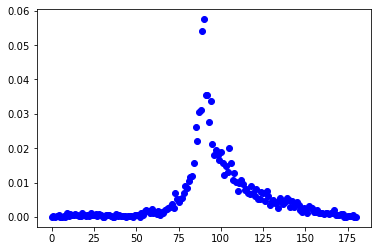

In [17]:
%%time

distr = generates_n_plates(1000)

print(np.array(distr).argmax())

plt.plot(distr, 'bo')

Wall time: 6.72 s


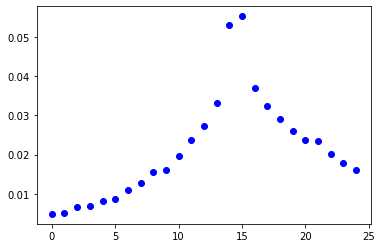

In [16]:
%%time

plt.plot(generates_n_plates(10000)[75:100], 'bo')

Wall time: 35.1 s


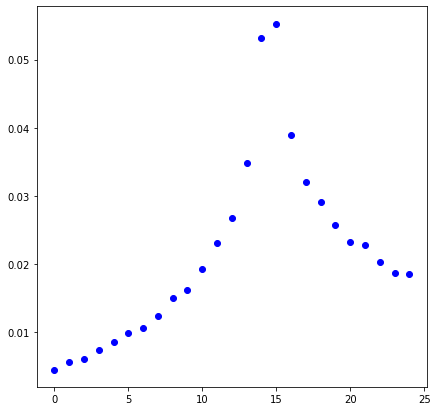

In [22]:
%%time

plt.figure(figsize=(7,7))
plt.plot(generates_n_plates(50000)[75:100], 'bo')

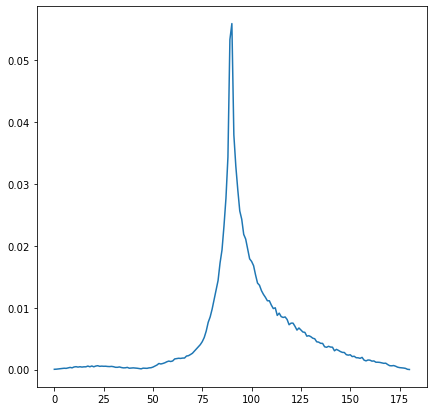

In [23]:
plt.figure(figsize=(7,7))
plt.plot(generates_n_plates(50000))

Wall time: 32.6 s


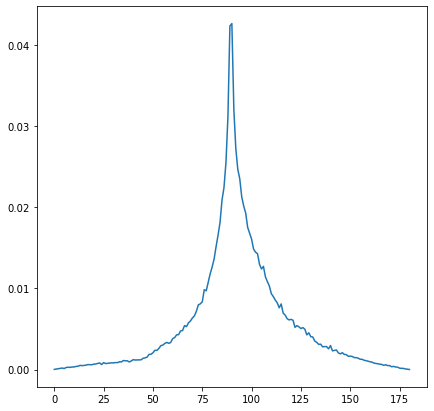

In [45]:
%%time
plt.figure(figsize=(7,7))

plt.plot(generates_n_plates(50000, side=0.5))

In [46]:
vertex_2 = generate_vertex_distribution(n=50000, side=0.5)
np.array(vertex_2)/50000*100

array([ 5.882,  0.   ,  0.   , 11.696, 47.89 , 25.29 ,  9.242])

In [51]:
vertex_2_ = vertex_2[3:]
vertex_2_ = np.array(vertex_2_)
vertex_2_/vertex_2_.sum()*100

array([12.4269534 , 50.88293419, 26.87052424,  9.81958818])

Wall time: 58.8 s


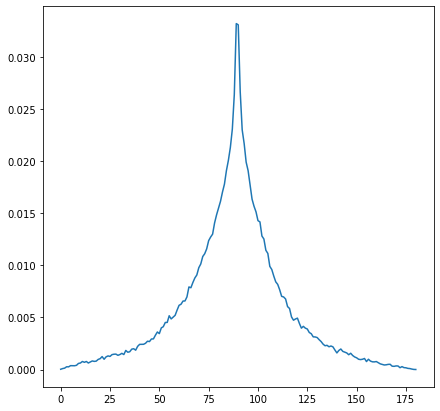

In [47]:
%%time
plt.figure(figsize=(7,7))

plt.plot(generates_n_plates(100000, side=0.1))

In [48]:
vertex_3 = generate_vertex_distribution(n=100000, side=0.1)
np.array(vertex_3)/100000*100

array([69.765,  0.   ,  0.   ,  8.844, 13.944,  5.565,  1.882])

In [52]:
vertex_3_ = vertex_3[3:]
vertex_3_ = np.array(vertex_3_)
vertex_3_/vertex_3_.sum()*100

array([29.2508682 , 46.11873656, 18.40582107,  6.22457417])

In [41]:
cube_2.A

Point(0.4, 0.4, 0.4)

In [146]:
generate_random_plane()

array([ 81.91479666,  98.08520334, 128.54837643, 133.36642023,
        98.08520334])

In [86]:
M = Point(0.5, 0, 0)
N = Point(1, 0.5, 0.5)
K = Point(0, 0, 1)

plane = Plane(M, N, K)
points_1 = cube.intersection_with_plane(plane)

In [106]:
a, b, c = M

In [107]:
a

0.5

In [60]:
enumerate(points_1)

TypeError: 'enumerate' object is not subscriptable

In [111]:
M = Point(0.5, 0, 0)
N = Point(1, 0.5, 0.5)
K = Point(0, 0, 1)

plane = Plane(M, N, K)

cube.intersection_with_plane(plane)

In [112]:
points_1

[Point(1.0, 0.3333333333333333, 0.0),
 Point(0.5, 0.0, 0.0),
 Point(0.0, 0.0, 1.0),
 Point(1.0, 0.6666666666666666, 1.0)]

In [119]:
get_angles(points_1)

array([100.10261179, 111.84544764,  68.15455236,  79.89738821])

In [114]:
plane_2 = Plane(Point(1, 0.6, 0.6), Point(0.55, 0.56, 1), Point(0.2, 0, 0))

In [115]:
points_2 = cube.intersection_with_plane(plane_2)

In [120]:
get_angles(points_2)

array([ 98.78892342, 133.53546339, 127.67561319,  98.78892342,
        81.21107658])

In [21]:
a = 1
A = Point(0, 0, 0)
B = Point(a, 0, 0)
C = Point(a, a, 0)
D = Point(0, a, 0)
E = Point(0, 0, a)
F = Point(a, 0, a)
G = Point(a, a, a)
H = Point(0, a, a)
iterable_points = [A, B, C, D, E, F, G, H]
names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

In [26]:
M = Point(0.5, 0, 0)
N = Point(1, 0.5, 0.5)
K = Point(0, 0, 1)

plane = Plane(M, N, K)
plane.general_form()

(0.5, -0.75, 0.25, 0.25)

In [27]:
AB = Line(A, B)
BC = Line(B, C)

intersection(AB, BC)

Point(1.0, 0.0, 0.0)

In [28]:
intersection(AB, plane)

Point(0.5, 0.0, 0.0)

In [25]:
plane

Plane(Point(0.5, 0.0, 0.0), Vector(0.0, -0.75, 0.75))

In [2]:
p = Point(1, 2, 3)
l = Line(Point(-1, -2, -3), Vector(1, 2, 3))
print(p in l)

True


In [3]:
l1 = Line(Point(0, 0, 0), Vector(3, 5, 7))
l2 = Line(Point(-3, -5, -7), Vector(6, 10, 14))
print(l1 == l2)

True


In [4]:
A = Point(0, 0, 0)
B = Point(3, 0, 0)
C = Point(0, 5, 0)
D = Point(0, 0, 7)

# This could be simplified if we account for the fact that this is a
# right-angled triangle, but we're using the generic way here
base = distance(A, B)
baseline = Line(A, B)
baseheight = distance(baseline, C)
area = 0.5 * base * baseheight
print("Area: %f" % area)

# Again we could simplify here, but we're using the generic way
baseplane = Plane(A, B, C)
height = distance(baseplane, D)
volume = 1.0 / 3 * area * height
print("Volume: %f" % volume)

Area: 7.500000
Volume: 17.500000


In [5]:
plane = Plane(Point(2, 3, 5), Vector(42, 0, 0))

print("General: %ix1 + %ix2 + %ix3 = %i" % plane.general_form())
print("Parametric: x = %s + r * %s + s * %s ; r,s e R" % plane.parametric())

General: 42x1 + 0x2 + 0x3 = 84
Parametric: x = Vector(2, 3, 5) + r * Vector(0.0, 1.0, 1.0) + s * Vector(0.0, -1.0, 1.0) ; r,s e R


In [7]:
line = Line(Point(0, 0, 0), Vector(1, 1, 1))
plane = Plane(Point(0, 0, 0), Vector(1, 1, 1))
vector = Vector(3, 5, 7)
point = intersection(line, plane)

In [13]:

a = Point(1, 2, 4)
b = Point(1, 7, 5)
c = Point(10, 2, 6)




In [14]:
Plane(a, b, c)

Plane(Point(1, 2, 4), Vector(10, 9, -45))